This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.
Recently, Tokyo olympics got over and I found it interesting to work on this as my assignment.
I found the dataset on kaggle https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

I hope to discover the geography and distribution of medals from country to country.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
#first step is to load the datasets and checking the first few rows of both the datasets.
athletes=pd.read_csv('C:/Users/praph/athlete_events.csv')
regions=pd.read_csv('C:/Users/praph/noc_regions.csv')


In [7]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
#now we'll combine both the datasets using pandas merge function (horizontal join)
athletes_df=athletes.merge(regions, how='left', on='NOC') #we are doing a left join and the mutual columns in both the datasets is NOC. 
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [10]:
#The column names are not consistent. All the columns except the last 2 are starting from capital letter. So we will use the rename function to make the column names consistent.
athletes_df.rename(columns={'region':'Region','notes':'Notes'}, inplace=True)
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [11]:
#to check how many rows and columns are present 
athletes_df.shape

(271116, 17)

In [12]:
#to get more information about the datatypes
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [13]:
#describe method is used to find the statistical information. It will give information about the numerical coulmns only
athletes_df.describe()
#if you observe the year column, the earliest is 1896 when the olympics actually started till the recent 2016 Rio olympics.

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


**To check if there are any null values in the dataset**

In [14]:
nan_values=athletes_df.isna() 
nan_columns=nan_values.any() #the boolean values represent if that particular column has null/missing values or not.
nan_columns #if True: missing values present.

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

**Total number of null values**

In [15]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

**Box plot with whiskers**
It is a method of visualizing the  1-D scatter plot more intuitivey

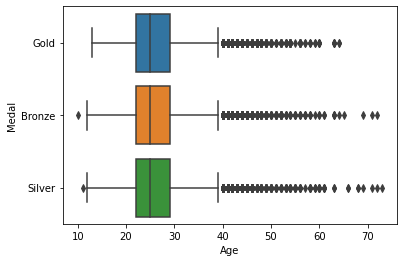

In [16]:
sns.boxplot(x='Age',y='Medal', data=athletes_df) #displays the medal distribution with age. Whiskers in the plot below do not correposnd to the min and max values.
plt.show()

In [13]:
#now, let us print the column names containing null/missing values in the form of a list
athletes_list=athletes_df.columns[athletes_df.isnull().any()].tolist()
athletes_list

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [20]:
#finding the mean of the age column
athletes_df["Age"].mean()

25.556898357297374

**Now, It's time to replace the missing age values with the mean of 'age' column**

In [21]:
athletes_df["Age"].fillna(athletes_df["Age"].mean())

0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
          ... 
271111    29.0
271112    27.0
271113    27.0
271114    30.0
271115    34.0
Name: Age, Length: 271116, dtype: float64

In [22]:
#Top countries participating in olympics since the beginning 
top_countries=athletes_df.Team.value_counts().sort_values(ascending=False).head(10)
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

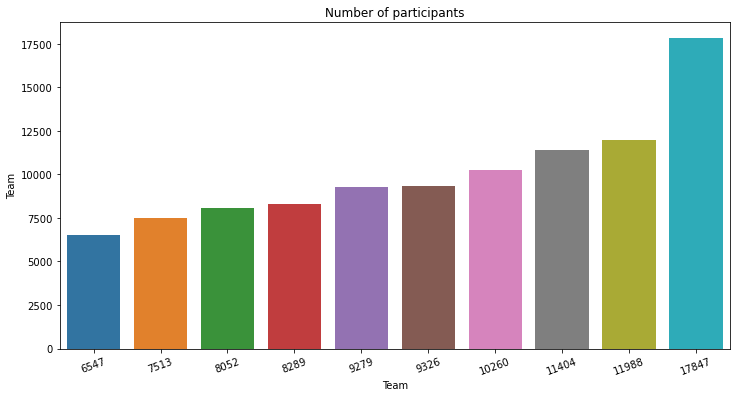

In [16]:
#plot for the top 10 countries
plt.figure(figsize=(12,6))
plt.xticks(rotation=20)
plt.title("Number of participants")
sns.barplot(x=top_countries, y=top_countries);

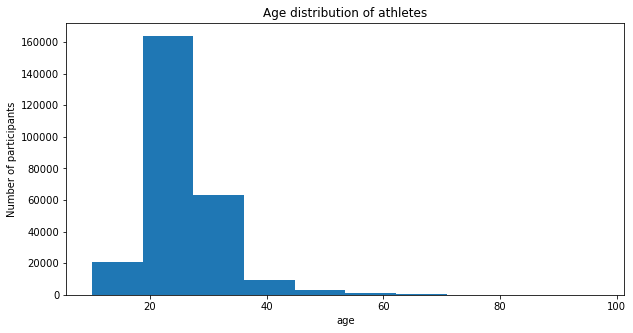

In [17]:
#To find the age distribution of athletes
plt.figure(figsize=(10,5))
plt.title("Age distribution of athletes")
plt.xlabel('age')
plt.ylabel('Number of participants')
plt.hist(athletes_df.Age);